In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('Vegetable Price.csv')

In [5]:
data.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [6]:
data.shape

(7, 2)

In [7]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  7 non-null      int64
 1   Price   7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [8]:
data.isnull().sum()

Weight    0
Price     0
dtype: int64

In [9]:
data[['Weight']].head()

,Weight
0,2
1,4
2,5
3,3
4,6


Text(0.5, 1.0, 'Vegetable Price Prediction')

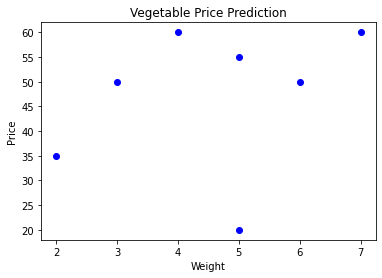

In [10]:
from matplotlib import pyplot as plt
plt.scatter(data['Weight'],data['Price'], color='blue')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Vegetable Price Prediction')

In [11]:
x = data['Weight']
y = data['Price']

In [12]:
import numpy as np

In [13]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [14]:
dev_x = x - mean_x
dev_y = y - mean_y

In [15]:
slope = np.sum(dev_x*dev_y)/np.sum(dev_x**2)
slope

2.620967741935484

In [16]:
intercept = mean_y - (slope*mean_x)
intercept

35.16129032258065

In [17]:
#Vegetable Price when weight is 6
pred_price = (slope*6) + intercept
pred_price

50.88709677419355

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()

In [21]:
reg.fit(data[['Weight']],data[['Price']])

LinearRegression()

In [24]:
reg.intercept_

array([35.16129032])

In [23]:
reg.coef_

array([[2.62096774]])

In [25]:
m = reg.coef_
c = reg.intercept_
#Vegetable Price when weight is 6
m*6 + c

array([[50.88709677]])

In [27]:
reg.predict([[6]])

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[50.88709677]])

In [28]:
data['Predicted_Price'] = reg.predict(data[['Weight']])

In [29]:
data.head()

,Weight,Price,Predicted_Price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097


In [39]:
data['residuals'] = data['Price']-data['Predicted_Price']

In [40]:
data.head()

,Weight,Price,Predicted_Price,residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097


In [41]:
res = data['residuals']
res_sum = np.sum(res**2)

In [43]:
mse_man = res_sum/7
mse_man

167.30990783410135

In [46]:
mae_man = np.sum(abs(res))/7
mae_man

9.87327188940092

In [47]:
#RMSE
import math
math.sqrt(mse_man)

12.934833119685052

In [ ]:
mse

In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(data['Price'],data['Predicted_Price'])

In [31]:
mse

167.30990783410135

In [33]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(data['Price'],data['Predicted_Price'])

In [34]:
mae

9.87327188940092

In [35]:
#RMSE
math.sqrt(mse)

12.934833119685052

Text(0.5, 1.0, 'Vegetable Price Prediction')

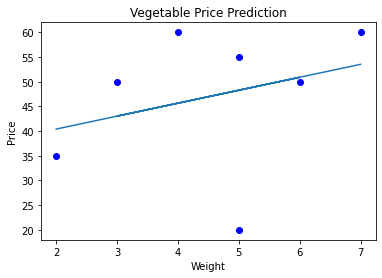

In [38]:
plt.plot(data['Weight'],data['Predicted_Price'])
plt.scatter(data['Weight'],data['Price'],color='blue')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Vegetable Price Prediction')